<a href="https://colab.research.google.com/github/DianaShramchenko/works/blob/main/2pr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №2. Использование глубоких нейронных сетей для решения задач регрессии и классификации



**Ссылка на код с пары:**
https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A?usp=sharing


## Задание №1. Обучение модели ИНС для решения задачи регрессии



Постройте глубокую нейронную сеть для предсказания цен на недвижимость в городе Бостон, используя датасет датасет boston_housing_price

[Описание датасета](https://www.hackersrealm.net/post/boston-house-price-prediction-analysis-using-python)

#### 1.1. Загружаем исходные данные:

In [2]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])
target = raw_df.values[1::2, 2]

# Имена переменных
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]
y = target
# Создание DataFrame X с указанными именами столбцов
X = pd.DataFrame(data, columns=column_names)

# Вывод первых строк DataFrame X
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### 1.2. Проектируем архитектуру для этой задачи

In [3]:
# Ваш код
from keras.layers import Dense
from keras.models import Sequential


model = Sequential([
    Dense(28, input_shape=(14,), activation='relu'),
    Dense(1, activation='relu')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28)                420       
                                                                 
 dense_1 (Dense)             (None, 1)                 29        
                                                                 
Total params: 449 (1.75 KB)
Trainable params: 449 (1.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 1.3. Компилируем модель ИНС

Подберите нужную функцию потерь и метрику.

In [4]:
# Ваш код
model.compile(optimizer='sgd', loss='mse', metrics='mae')

#### 1.4. Обучаем модель ИНС

In [5]:
# Ваш код
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((404, 14), (102, 14))

In [6]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
13/13 [==============================] - 2s 6ms/step - loss: 724.1970 - mae: 24.2396
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 596.4409 - mae: 22.6119
Epoch 3/10
13/13 [==============================] - 0s 7ms/step - loss: 596.4409 - mae: 22.6119
Epoch 4/10
13/13 [==============================] - 0s 10ms/step - loss: 596.4409 - mae: 22.6119
Epoch 5/10
13/13 [==============================] - 0s 10ms/step - loss: 596.4409 - mae: 22.6119
Epoch 6/10
13/13 [==============================] - 0s 7ms/step - loss: 596.4409 - mae: 22.6119
Epoch 7/10
13/13 [==============================] - 0s 7ms/step - loss: 596.4409 - mae: 22.6119
Epoch 8/10
13/13 [==============================] - 0s 10ms/step - loss: 596.4409 - mae: 22.6119
Epoch 9/10
13/13 [==============================] - 0s 10ms/step - loss: 596.4409 - mae: 22.6119
Epoch 10/10
13/13 [==============================] - 0s 8ms/step - loss: 596.4409 - mae: 22.6119


In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()  # Масштабирование в диапазон 0-1

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Сохранение модели scaler
import pickle

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
X_train

array([[0.00395381, 0.        , 0.21041056, ..., 0.98688789, 0.22638298,
        0.48222222],
       [0.00171339, 0.        , 0.37939883, ..., 0.94966968, 0.23120567,
        0.37111111],
       [0.00120232, 0.3       , 0.1638563 , ..., 0.98575319, 0.27375887,
        0.37777778],
       ...,
       [0.00162594, 0.        , 0.35007331, ..., 0.99397347, 0.24312057,
        0.31555556],
       [0.0025059 , 0.        , 0.23643695, ..., 0.98951031, 0.48425532,
        0.25777778],
       [0.00149286, 0.        , 0.13159824, ..., 1.        , 0.36765957,
        0.40222222]])

In [8]:
model = Sequential([
    Dense(28, input_shape=(14,), activation='relu'),
    Dense(14, activation='relu'),
    Dense(1, activation='relu')
])

model.compile(optimizer='sgd', loss='mse', metrics='mae')

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
13/13 [==============================] - 1s 21ms/step - loss: 646.6202 - mae: 22.5114 - val_loss: 403.2310 - val_mae: 17.9604
Epoch 2/30
13/13 [==============================] - 0s 6ms/step - loss: 219.1569 - mae: 11.8431 - val_loss: 72.9107 - val_mae: 6.3875
Epoch 3/30
13/13 [==============================] - 0s 5ms/step - loss: 110.4910 - mae: 7.7346 - val_loss: 82.9833 - val_mae: 5.6435
Epoch 4/30
13/13 [==============================] - 0s 4ms/step - loss: 57.2148 - mae: 5.6348 - val_loss: 52.2994 - val_mae: 5.4362
Epoch 5/30
13/13 [==============================] - 0s 5ms/step - loss: 42.0529 - mae: 5.0060 - val_loss: 55.1669 - val_mae: 4.7748
Epoch 6/30
13/13 [==============================] - 0s 5ms/step - loss: 21.9541 - mae: 3.5601 - val_loss: 17.7715 - val_mae: 3.0284
Epoch 7/30
13/13 [==============================] - 0s 4ms/step - loss: 18.8023 - mae: 3.1094 - val_loss: 30.5208 - val_mae: 3.9093
Epoch 8/30
13/13 [==============================] - 0s 6ms/step - lo

#### 1.6. Делаем предсказания на тестовых данных

In [9]:
# Ваш код
preds = model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


#### 1.7. Вычисляем метрику качества на тестовых данных

In [15]:
# Ваш код
from sklearn.metrics import mean_absolute_error

mean_absolute_error(preds, y_test)

2.156560514487472

#### 1.8. Строим график обучения

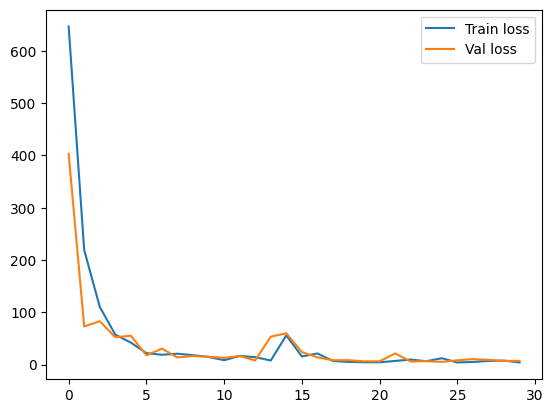

In [11]:
# Ваш код
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend()
plt.show()

#### 1.9. Построение графического интерфейса в Gradio Проверка обученной модели пользовательскими данными

In [12]:
# Ваш код
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 9.5 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size

#### 2. Проверка обученной модели пользовательскими данными

In [35]:
def preprocess_input(features, scale_model="scaler.pkl"):
# Функция преобразует входные данные в формат, подходящий для модели машинного обучения.
# Args: features: Список или массив с входными признаками.
# scale_model: Путь к файлу с сохраненной моделью масштабирования.
# Returns: Преобразованный массив признаков.
  try:
    # Преобразование в NumPy массив
    features = np.array(features)

    # Проверка на пустой массив
    if not features.size:
      raise ValueError("Пустой массив признаков!")

    # Изменение размерности массива (8,) -> (1, 8)
    features = features.reshape(1, -1)

    # Загрузка модели масштабирования
    with open(scale_model, "rb") as f:
      scaler = pickle.load(f)

    # Масштабирование признаков
    features = scaler.transform(features)

  except Exception as e:
    raise ValueError(f"Ошибка при предобработке: {e}")

  return features

In [36]:
def predict_price(*features):

  """
  Функция прогнозирует цену на основе предобработанных
  входных признаков.

  Args:
      features: Список или массив с входными признаками.

  Returns:
      Прогнозируемая цена (в долларах).
  """

  try:
    # Предобработка входных признаков
    features = preprocess_input(features)

    # Прогнозирование цены
    prediction = model.predict(features, verbose=0)

    # Проверка на ошибки прогнозирования
    if np.isnan(prediction).any():
      raise ValueError("Ошибка при прогнозировании: NaN")

  except Exception as e:
    raise ValueError(f"Ошибка при прогнозировании: {e}")

  # Возвращение прогнозируемой цены
  # (умножение на 1000 для отображения в тысячах долларов)
  return f"{prediction[0][0] * 1000}"

In [37]:
import gradio as gr

# Интерфейс Gradio
interface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Slider(label="CRIM", minimum=0, maximum=89, step=0.1, value=8.3252),
        gr.Slider(label="ZN", minimum=11.36, maximum=100, step=1, value=41.0),
        gr.Slider(label="INDUS", minimum=0.46, maximum=27.74, step=0.01, value=6.984127),
        gr.Slider(label="CHAS", minimum=0, maximum=1, step=0.01, value=0.2),
        gr.Slider(label="NOX", minimum=1, maximum=15000, step=1, value=322.0),
        gr.Slider(label="RM", minimum=0, maximum=1, step=0.1, value=2.555556),
        gr.Slider(label="AGE", minimum=2.9, maximum=100, step=0.1, value=37.88),
        gr.Slider(label="DIS", minimum=1.2, maximum=12.12, step=0.1, value=2),
        gr.Slider(label="RAD", minimum=1, maximum=24, step=0.1, value=12),
        gr.Slider(label="TAX", minimum=187, maximum=711, step=1, value=300),
        gr.Slider(label="PTRATIO", minimum=12.6, maximum=22, step=0.1, value=15),
        gr.Slider(label="B", minimum=0.32, maximum=396.9, step=0.1, value=130),
        gr.Slider(label="LSTAT", minimum=1.73, maximum=37.97, step=0.1, value=22),
        gr.Slider(label="MEDV", minimum=5, maximum=50, step=0.1, value=13),
    ],
    # Обновление при каждом изменении
    live=True,
    outputs=gr.Text(label="Predicted Price ($)"),
)

# Запуск интерфейса
interface.launch(debug=False, share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://1bcd9b2e7d82d4efd2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


## Задание №2.Обучение модели ИНС для решения задачи классификации



Порядок работы:

* 1. Собрать датасет из изображений, соответствующих не менее, чем 3 классам объектов (в
примере с пары были кошки, собаки и панды).


- 2. Для каждого класса должно быть собрано не менее 1000 изображений. Количество
изображений для каждого класса должно быть одинаковым.
Готовые датасеты можно скачать отсюда: https://www.kaggle.com/


- 3. Обучить модель глубокой нейронной сети для решения задачи классификации
изображений, по выбранным Вами классам. (В качестве примера приведён код с пары)
В конечном итоге Вы должны сохранить обученную модель для классификации
изображений, соответствующих тем классам, которые Вы выбрали, а затем воспользоваться этой моделью для предсказания классов на пользовательских изображениях.



> При выполнении заданий пробуйте использовать разные функции потерь,
методы оптимизации, функции активации и метрики ошибок.

### 1. Устанавливаем зависимости:

In [38]:
# Импортируем LabelBinarizer для преобразования текстовых меток в векторы
# (например, "кошка" -> [1, 0, 0], "собака" -> [0, 1, 0], "панда" -> [0, 0, 1])
from sklearn.preprocessing import LabelBinarizer

# Импортируем train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импортируем classification_report для оценки качества классификации
from sklearn.metrics import classification_report

# Импортируем Sequential для создания последовательной модели нейронной сети
from keras.models import Sequential

# Импортируем Dense для создания плотных слоев нейронной сети
from keras.layers import Dense

# Импортируем SGD и Adam для оптимизации обучения нейронной сети
from keras.optimizers import SGD, Adam

# Импортируем paths из imutils для удобной работы с путями к изображениям
from imutils import paths

# Импортируем pyplot из matplotlib для визуализации данных
import matplotlib.pyplot as plt

# Импортируем numpy для работы с массивами данных
import numpy as np

# Импортируем random для генерации случайных чисел
import random

# Импортируем pickle для сериализации и десериализации данных
import pickle

# Импортируем cv2 для работы с изображениями
import cv2

# Импортируем os для работы с файловой системой
import os

# Импортируем cv2_imshow из google.colab.patches для отображения изображений в Colab
from google.colab.patches import cv2_imshow

### 2. Загружаем набор данных:

In [39]:
# Ваш код
# импортируем бэкенд Agg из matplotlib для сохранения графиков на диск
import matplotlib
matplotlib.use("Agg")

In [40]:
# Подключаем необходимые модули и пакеты
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
from google.colab.patches import cv2_imshow
import os

In [41]:
%%capture
DATADIR = 'Dataset'
if os.path.isdir(DATADIR)>0:
    print ('Data directory already exists and it is not empty, miss downloading')
else:
    print ('Data directory does not exists or it is empty, download the dataset')
    !gdown --id 1SaAEAxiqU4sSXsFEja1JRARpXCGQIkJN #Скопировать ID из ссылки в гугл диске
    !unzip Dataset.zip

In [42]:
# инициализируем данные и метки
print("[INFO] loading images...")
data = []
labels = []

[INFO] loading images...


In [43]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 3. Указываем путь к набору данных:

In [44]:
# Ваш код
# Собираем список путей к каждому изображению и перемешиваем их
imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/content/vegetables")))
print(imagePaths[700].split(os.path.sep)[-2])
random.shuffle(imagePaths)

apple


### 4. Загружаем набор данных и формируем общую выборку:

In [45]:
# Ваш код
# цикл по изображениям
for imagePath in imagePaths:

	image = cv2.imread(imagePath) # загружаем изображение
	image = cv2.resize(image, (32, 32)).flatten() # меняем его разрешение на 32x32 пикселей (без учета соотношения сторон),
																								# а затем "выраниваем" его в вектор, состоящий из (32*32*3) 3072 пикселей
	data.append(image) # добавляем в список

	label = imagePath.split(os.path.sep)[-2] 	# извлекаем метку класса из пути к изображению (метка класса зависит от имени папки)
	labels.append(label) # обновляем список меток

#### 4.1. Нормализуем данные:

Масштабируем интенсивности пикселей в диапазон [0, 1], а также преобразуем данные в массивы NumPy для повышения производительности


In [46]:
# Ваш код
# масштабируем интенсивности пикселей в диапазон [0, 1] (Нормализация данных)
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

#### 4.2. Формируем обучающую и валидационную выборки:

Разделяем данные на обучающую и валидационную выборки, используя 75% данных для обучения и оставшиеся 25% для валидации

In [47]:
# Ваш код
# разбиваем данные на обучающую и тестовую выборки, используя 75%
# данных для обучения и оставшиеся 25% для тестирования
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=42)

In [48]:
# конвертируем метки из целых чисел в векторы (для 2х классов при
# бинарной классификации вам следует использовать функцию Keras
# "to_categorical" вместо "LabelBinarizer" из scikit-learn, которая не возвращает вектор)
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

### 5. Создание модели:

#### 5.1. Определим архитектуру модели с помощью Keras:

In [49]:
# Ваш код
# определим архитектуру 3072-1024-512-3 с помощью Keras
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(len(lb.classes_), activation="softmax"))

#### 5.2. Установим значение параметров скорости обучения и общего числа эпох


In [50]:
# инициализируем скорость обучения и общее число эпох
INIT_LR = 0.01
EPOCHS = 80

#### 5.3. Компилируем модель:

In [51]:
# компилируем модель, используя SGD как оптимизатор и категориальную
# кросс-энтропию в качестве функции потерь (для бинарной классификации
# следует использовать binary_crossentropy)
print("[INFO] training network...")
opt = SGD(lr=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] training network...


### 6. Обучение модели искусственной нейронной сети:

#### 6.1. Добавим колбэки для сохранения лучшей модели по валидационной точности и остановки обучения, в случае, если модель перестала обучаться:

In [52]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(patience=5) # Остановка обучения, если
                                             # валидационная точность не
                                             # улучшается в течение 5 эпох
checkpoint = ModelCheckpoint(filepath="best_model.h5",
                             monitor="val_accuracy",
                             save_best_only=True,
                             verbose=0) # Сохранение модели
                                         # только при улучшении
                                         # валидационной точности

#### 6.2. Запустим процесс обучения модели:

In [53]:
# обучаем нейросеть
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=EPOCHS, batch_size=100, callbacks=[early_stopping, checkpoint])

Epoch 1/80
25/25 [==============================] - 7s 184ms/step - loss: 0.6621 - accuracy: 0.7325 - val_loss: 0.3615 - val_accuracy: 0.8860


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/80
25/25 [==============================] - 2s 90ms/step - loss: 0.3230 - accuracy: 0.9002 - val_loss: 0.2940 - val_accuracy: 0.9032
Epoch 3/80
25/25 [==============================] - 3s 105ms/step - loss: 0.2608 - accuracy: 0.9112 - val_loss: 0.2980 - val_accuracy: 0.9167
Epoch 4/80
25/25 [==============================] - 3s 106ms/step - loss: 0.2423 - accuracy: 0.9141 - val_loss: 0.2455 - val_accuracy: 0.9105
Epoch 5/80
25/25 [==============================] - 1s 56ms/step - loss: 0.2244 - accuracy: 0.9202 - val_loss: 0.2272 - val_accuracy: 0.9130
Epoch 6/80
25/25 [==============================] - 1s 59ms/step - loss: 0.2113 - accuracy: 0.9256 - val_loss: 0.2372 - val_accuracy: 0.9191
Epoch 7/80
25/25 [==============================] - 2s 87ms/step - loss: 0.1976 - accuracy: 0.9264 - val_loss: 0.2087 - val_accuracy: 0.9252
Epoch 8/80
25/25 [==============================] - 2s 79ms/step - loss: 0.1906 - accuracy: 0.9309 - val_loss: 0.1975 - val_accuracy: 0.9228
Epoch 9/80


#### 6.3. Загружаем лучшую модель:

In [54]:
# Ваш код
from keras.models import load_model

model = load_model("/content/best_model.h5")

### 7. Оценка точности:

#### 7.1. Выведем отчет классификации

In [55]:
# оцениваем нейросеть
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=45)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
19/19 [==============================] - 0s 18ms/step
              precision    recall  f1-score   support

       apple       0.91      0.97      0.94       270
       lemon       0.96      1.00      0.98       279
      tomato       0.98      0.88      0.93       267

    accuracy                           0.95       816
   macro avg       0.95      0.95      0.95       816
weighted avg       0.95      0.95      0.95       816



#### 7.2. Выведем матрицу ошибок

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Получим прогнозы по валидационным даннным
Y_pred = model.predict(testX, batch_size=32)

# Преобразуем вероятности в метки классов
Y_pred = Y_pred.argmax(axis=1)
Y_val = testY.argmax(axis=1)

# Вычисляем матрицу ошибок
conf_mat = confusion_matrix(Y_val, Y_pred)

# Визуализируем матрицу ошибок
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

26/26 [==============================] - 0s 18ms/step


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79]


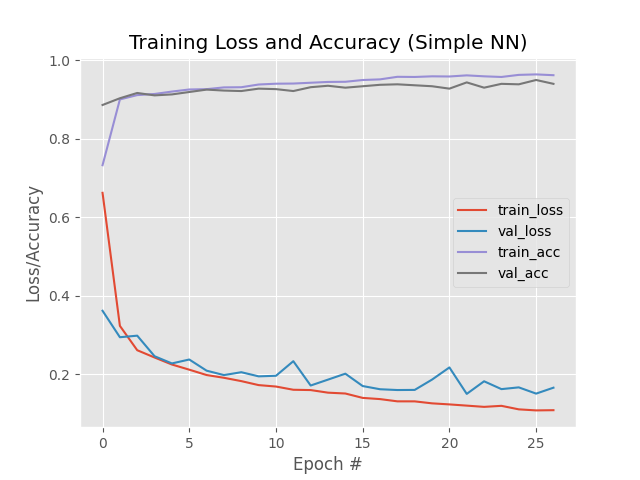

In [61]:
# строим графики потерь и точности
N = np.arange(0, EPOCHS)
print(N)
plt.style.use("ggplot")
plt.figure()
#plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(H.history["loss"], label="train_loss")
plt.plot(H.history["val_loss"], label="val_loss")
plt.plot(H.history["accuracy"], label="train_acc")
plt.plot(H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('plot.png')
cv2_imshow(cv2.imread("plot.png"))

#### 7.3. Отобразим график обучения

### 8. Сохранение модели и меток классов:

In [63]:
# Ваш код
def save_model_and_labels(model, lb, model_path = "model.h5", labels_path = "label_bin"):

    # Сохранение модели
    model.save(model_path, save_format="h5")

    # Сохранение меток
    with open(labels_path, "wb") as f:
        f.write(pickle.dumps(lb))

In [64]:
model_path = "model.h5"
labels_path = "label_bin"

save_model_and_labels(model, lb, model_path, labels_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### 9. Проверка обученной модели пользовательскими данными:

#### 9.1. Импортируем необходимые библиотеки

In [65]:
# Ваш код
!pip install gradio

In [66]:
from keras.models import load_model
import gradio as gr  # Библиотека для создания веб-интерфейсов
import pickle
import cv2

#### 9.2. Реализуем функцию для предобработки входных данных в той же последовательности, что и при формировании обучающей выборки:

In [67]:
# Функция для предобработки изображения
def preprocess_image(img, compression_size = 32):

    image = img.copy()  # Создаем копию изображения
    # Изменяем размер изображения до compression_size x compression_size пикселей
    image = cv2.resize(image, (compression_size, compression_size))
    # Преобразуем изображение в одномерный массив (вектор)
    image = image.flatten()
    # Масштабируем значения пикселей к диапазону [0, 1]
    image = image.astype("float") / 255.0
    # Преобразуем массив в формат, совместимый с нашей моделью Keras
    image = image.reshape((1, image.shape[0]))

    return image

#### 9.3. Определим функцию для осуществления прогноза по загруженной модели:

In [68]:
def predict_image(img, preprocess_func = preprocess_image, model_path = "model.h5", label_path = "label_bin"):

    # Загружаем модель и метки
    model = load_model(model_path)  # Загрузка модели Keras
    lb = pickle.loads(open(label_path, "rb").read())  # Загрузка словаря с метками

    # Делаем предсказание на изображении
    image = preprocess_func(img.copy())  # Предобработка изображения
    preds = model.predict(image).flatten()  # Выполнение предсказания

    # Возвращаем словарь с метками и вероятностями для каждого класса
    confidences = {lb.classes_[i]: float(preds[i]) for i in range(len(preds))}

    return confidences

### 10. Визуализируем интерфейс и произведем классификацию:

In [74]:
# Создаем интерфейс Gradio
interface = gr.Interface(
    fn=predict_image,  # Функция, которая будет вызываться при загрузке изображения
    inputs=gr.Image(label="Загрузите изображение"),  # Входные данные: изображение
    outputs= gr.Label(num_top_classes=len(lb.classes_)), # Выходные данные: топ-N классов с наибольшей вероятностью
    examples=["/content/drive/MyDrive/content/vegetables/lemon/lemon_1.jpg",
              "/content/drive/MyDrive/content/vegetables/tomato/tomato_0926.jpeg",
              "/content/drive/MyDrive/content/vegetables/apple/apple_0556.jpg"])

# Запускаем интерфейс
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://0acf7ddb754cbfe4ec.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
